In [ ]:
#To understand the impact of optimizers with different learning rates on the accuracy of a neural network
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, accuracy_score
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
df = pd.read_csv('seeds.csv')

In [ ]:
df

,Area,Perimeter,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kernel.Groove,Type
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
...,...,...,...,...,...,...,...,...
194,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
195,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
196,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
197,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3


<Axes: >

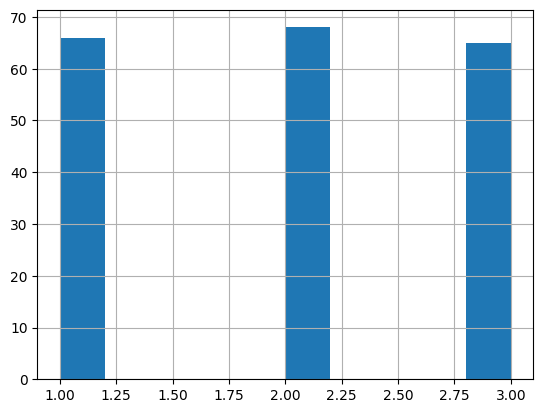

In [ ]:
df['Type'].hist()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             199 non-null    float64
 1   Perimeter        199 non-null    float64
 2   Compactness      199 non-null    float64
 3   Kernel.Length    199 non-null    float64
 4   Kernel.Width     199 non-null    float64
 5   Asymmetry.Coeff  199 non-null    float64
 6   Kernel.Groove    199 non-null    float64
 7   Type             199 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 12.6 KB


In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the data
df['Type'] = label_encoder.fit_transform(df['Type'])

In [ ]:
df

,Area,Perimeter,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kernel.Groove,Type
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,0
...,...,...,...,...,...,...,...,...
194,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,2
195,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,2
196,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,2
197,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,2


In [ ]:
X = df.drop('Type', axis =1)
y = df['Type']

In [ ]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

numerical_columns = X.select_dtypes(include=['float64', 'int64']).columns
scaler = StandardScaler()
X[numerical_columns] = scaler.fit_transform(X[numerical_columns])

In [ ]:
X

,Area,Perimeter,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kernel.Groove
0,0.117164,0.186797,0.008144,0.270860,0.123135,-1.007371,-0.408265
1,-0.013302,-0.019760,0.442341,-0.201481,0.178783,-1.827187,-0.945420
2,-0.215868,-0.386972,1.469798,-0.795861,0.189383,-0.681625,-1.211962
3,-0.370368,-0.501725,1.061395,-0.721281,0.300679,-0.981475,-1.252656
4,0.419297,0.301550,1.401014,0.033559,0.785615,-1.597530,-0.499825
...,...,...,...,...,...,...,...
194,-0.936866,-1.067843,0.321970,-1.143902,-0.753989,-0.046488,-1.120402
195,-1.266465,-1.312651,-0.847353,-1.137122,-1.246874,0.426457,-0.849790
196,-0.590100,-0.715932,0.751868,-0.920162,-0.088859,3.145549,-0.741952
197,-1.057032,-1.060193,-0.804363,-1.058022,-1.138227,-0.068977,-0.766368


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
input_shape = X_train.shape[1]

0.1
5/5 [==============================] - 0s 3ms/step - loss: 0.0541 - accuracy: 0.9686
Train Loss: 0.0541, Train Accuracy: 0.9686

2/2 [==============================] - 0s 7ms/step - loss: 0.1414 - accuracy: 0.9250
Test Loss: 0.1414, Test Accuracy: 0.9250

0.01
5/5 [==============================] - 0s 3ms/step - loss: 0.1753 - accuracy: 0.9560
Train Loss: 0.1753, Train Accuracy: 0.9560

2/2 [==============================] - 0s 7ms/step - loss: 0.2404 - accuracy: 0.8750
Test Loss: 0.2404, Test Accuracy: 0.8750

0.001
5/5 [==============================] - 0s 3ms/step - loss: 0.8502 - accuracy: 0.7547
Train Loss: 0.8502, Train Accuracy: 0.7547

2/2 [==============================] - 0s 6ms/step - loss: 0.8863 - accuracy: 0.7750
Test Loss: 0.8863, Test Accuracy: 0.7750

0.0001
5/5 [==============================] - 0s 4ms/step - loss: 0.9500 - accuracy: 0.3459
Train Loss: 0.9500, Train Accuracy: 0.3459

2/2 [==============================] - 0s 7ms/step - loss: 0.8877 - accuracy: 0.4

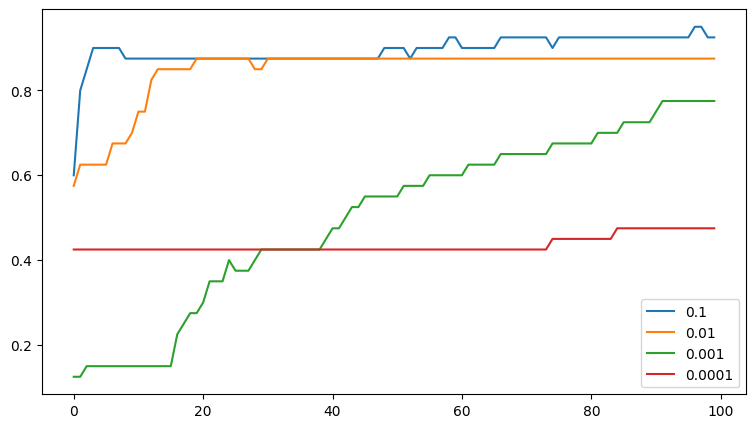

In [ ]:
from sklearn.metrics import mean_squared_error, accuracy_score
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import InputLayer
import tensorflow as tf
import keras

learning_rates = [0.1,0.01,0.001,0.0001]

plt.figure(figsize=(20,5))
for lr in learning_rates:
  model = tf.keras.Sequential()
  model.add(InputLayer(input_shape=(7,)))
  model.add(Dense(units=32,activation='relu', name='hidden_layer1'))
  model.add(Dense(units=16,activation='relu', name='hidden_layer2'))
  model.add(Dense(units=3,activation='softmax', name='output_layer'))
  sgd = tf.keras.optimizers.SGD(learning_rate=lr)
  model.compile(optimizer=sgd, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
  history = model.fit(X_train,y_train,validation_data = (X_test,y_test), epochs = 100 , verbose=0)
  print(lr)
  loss, accuracy = model.evaluate(X_train, y_train)
  print(f'Train Loss: {loss:.4f}, Train Accuracy: {accuracy:.4f}\n')
  loss, accuracy = model.evaluate(X_test, y_test)
  print(f'Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}\n')
  plt.subplot(1,2,1)
  plt.plot(history.history['val_accuracy'], label = str(lr))
plt.legend()
plt.show()


0.0001
5/5 [==============================] - 0s 5ms/step - loss: 0.0478 - accuracy: 0.9748
Train Loss: 0.0478, Train Accuracy: 0.9748

2/2 [==============================] - 0s 7ms/step - loss: 0.2148 - accuracy: 0.9000
Test Loss: 0.2148, Test Accuracy: 0.9000

0.0001
5/5 [==============================] - 0s 4ms/step - loss: 0.0276 - accuracy: 0.9937
Train Loss: 0.0276, Train Accuracy: 0.9937

2/2 [==============================] - 0s 6ms/step - loss: 0.1463 - accuracy: 0.9500
Test Loss: 0.1463, Test Accuracy: 0.9500

0.0001
5/5 [==============================] - 0s 3ms/step - loss: 0.0015 - accuracy: 1.0000
Train Loss: 0.0015, Train Accuracy: 1.0000

2/2 [==============================] - 0s 6ms/step - loss: 0.2164 - accuracy: 0.9500
Test Loss: 0.2164, Test Accuracy: 0.9500

0.0001
5/5 [==============================] - 0s 3ms/step - loss: 1.1210 - accuracy: 0.3648
Train Loss: 1.1210, Train Accuracy: 0.3648

2/2 [==============================] - 0s 6ms/step - loss: 1.1816 - accurac

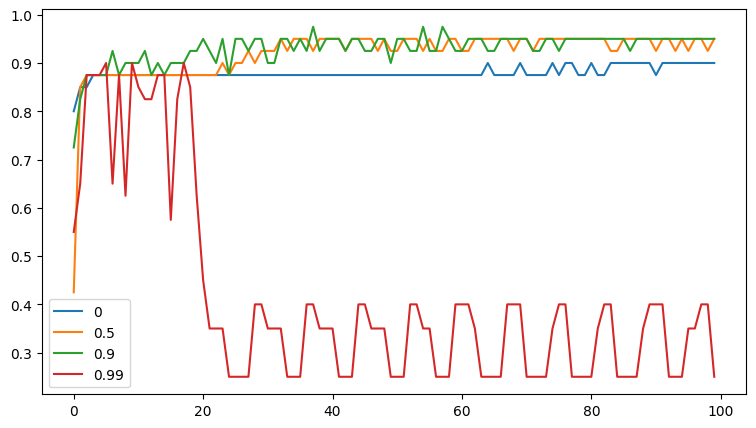

In [ ]:
momentum = [0, 0.5, 0.9, 0.99]

plt.figure(figsize=(20,5))
for m in momentum:
  model = tf.keras.Sequential()
  model.add(InputLayer(input_shape=(7,)))
  model.add(Dense(units=32,activation='relu', name='hidden_layer1'))
  model.add(Dense(units=16,activation='relu', name='hidden_layer2'))
  model.add(Dense(units=3,activation='softmax', name='output_layer'))
  sgd = tf.keras.optimizers.SGD(learning_rate=0.1,momentum=m)
  model.compile(optimizer=sgd, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
  history = model.fit(X_train,y_train,validation_data = (X_test,y_test), epochs = 100 , verbose=0)
  print(m)
  loss, accuracy = model.evaluate(X_train, y_train)
  print(f'Train Loss: {loss:.4f}, Train Accuracy: {accuracy:.4f}\n')
  loss, accuracy = model.evaluate(X_test, y_test)
  print(f'Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}\n')
  plt.subplot(1,2,1)
  plt.plot(history.history['val_accuracy'], label = str(m))
plt.legend()
plt.show()

0.1
5/5 [==============================] - 0s 3ms/step - loss: 0.0651 - accuracy: 0.9686
Train Loss: 0.0651, Train Accuracy: 0.9686

2/2 [==============================] - 0s 7ms/step - loss: 0.1906 - accuracy: 0.9000
Test Loss: 0.1906, Test Accuracy: 0.9000

0.01
5/5 [==============================] - 0s 3ms/step - loss: 0.0134 - accuracy: 1.0000
Train Loss: 0.0134, Train Accuracy: 1.0000

2/2 [==============================] - 0s 8ms/step - loss: 0.2143 - accuracy: 0.9250
Test Loss: 0.2143, Test Accuracy: 0.9250

0.001
5/5 [==============================] - 0s 4ms/step - loss: 0.0026 - accuracy: 1.0000
Train Loss: 0.0026, Train Accuracy: 1.0000

2/2 [==============================] - 0s 7ms/step - loss: 0.2382 - accuracy: 0.9500
Test Loss: 0.2382, Test Accuracy: 0.9500

0.0001
5/5 [==============================] - 0s 3ms/step - loss: 0.0013 - accuracy: 1.0000
Train Loss: 0.0013, Train Accuracy: 1.0000

2/2 [==============================] - 0s 7ms/step - loss: 0.2392 - accuracy: 0.9

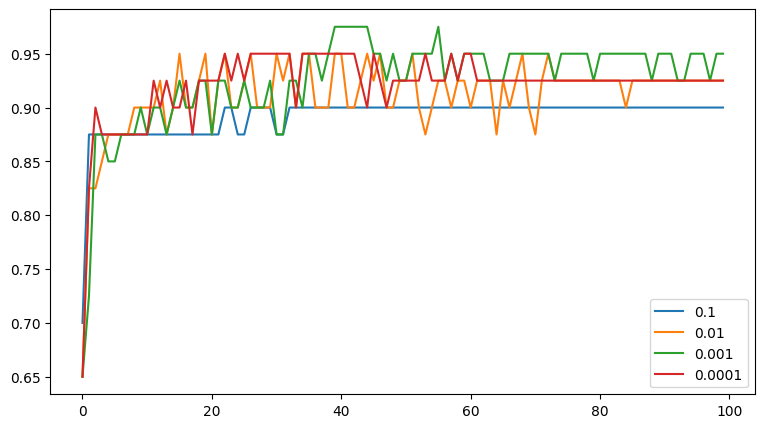

In [ ]:
decay = [1e-1, 1e-2, 1e-3, 1e-4]
plt.figure(figsize=(20,5))
for d in decay:
  model = tf.keras.Sequential()
  model.add(InputLayer(input_shape=(7,)))
  model.add(Dense(units=32,activation='relu', name='hidden_layer1'))
  model.add(Dense(units=16,activation='relu', name='hidden_layer2'))
  model.add(Dense(units=3,activation='softmax', name='output_layer'))
  sgd = tf.keras.optimizers.legacy.SGD(learning_rate=0.1,momentum=0.9, decay=d)
  model.compile(optimizer=sgd, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
  history = model.fit(X_train,y_train,validation_data = (X_test,y_test), epochs = 100 , verbose=0)
  print(d)
  loss, accuracy = model.evaluate(X_train, y_train)
  print(f'Train Loss: {loss:.4f}, Train Accuracy: {accuracy:.4f}\n')
  loss, accuracy = model.evaluate(X_test, y_test)
  print(f'Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}\n')
  plt.subplot(1,2,1)
  plt.plot(history.history['val_accuracy'], label = str(d))
plt.legend()
plt.show()

5/5 [==============================] - 0s 5ms/step - loss: 0.0241 - accuracy: 0.9937
Train Loss: 0.0241, Train Accuracy: 0.9937

2/2 [==============================] - 0s 7ms/step - loss: 0.1983 - accuracy: 0.9250
Test Loss: 0.1983, Test Accuracy: 0.9250

5/5 [==============================] - 0s 3ms/step - loss: 0.0145 - accuracy: 0.9937
Train Loss: 0.0145, Train Accuracy: 0.9937

2/2 [==============================] - 0s 7ms/step - loss: 0.4889 - accuracy: 0.9250
Test Loss: 0.4889, Test Accuracy: 0.9250

5/5 [==============================] - 0s 6ms/step - loss: 0.0134 - accuracy: 0.9937
Train Loss: 0.0134, Train Accuracy: 0.9937

2/2 [==============================] - 0s 11ms/step - loss: 2.0136 - accuracy: 0.8750
Test Loss: 2.0136, Test Accuracy: 0.8750



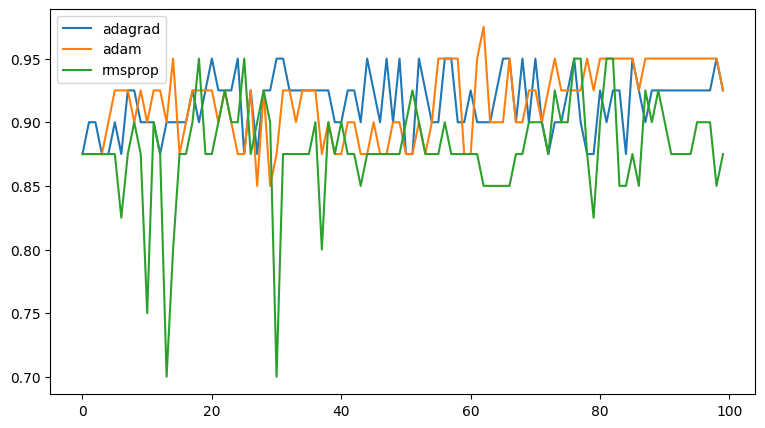

In [ ]:
from keras.optimizers import Adagrad, Adam, RMSprop
plt.figure(figsize=(20,5))
optimizers = ['adagrad', 'adam', 'rmsprop']
for o in optimizers:
    model = tf.keras.Sequential()
    model.add(InputLayer(input_shape=(7,)))
    model.add(Dense(units=32,activation='relu', name='hidden_layer1'))
    model.add(Dense(units=16,activation='relu', name='hidden_layer2'))
    model.add(Dense(units=3,activation='softmax', name='output_layer'))
    if o == 'adagrad':
        opt = Adagrad(learning_rate=0.1)
    elif o == 'adam':
        opt = Adam(learning_rate=0.1)
    elif o == 'rmsprop':
        opt = RMSprop(learning_rate=0.1)
    model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train,y_train,validation_data = (X_test,y_test), epochs = 100 , verbose=0)
    print(opt)
    loss, accuracy = model.evaluate(X_train, y_train)
    print(f'Train Loss: {loss:.4f}, Train Accuracy: {accuracy:.4f}\n')
    loss, accuracy = model.evaluate(X_test, y_test)
    print(f'Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}\n')
    plt.subplot(1,2,1)
    plt.plot(history.history['val_accuracy'], label = str(o))
plt.legend()
plt.show()

